In [75]:
import numpy as np
import math, copy
import matplotlib.pyplot as plt
import pandas as pd


In [76]:
df = pd.read_csv('Salary_Data.csv')
exp = df["YearsExperience"].values
wage = df["Salary"].values
print(exp)
print(wage)

[ 1.1  1.3  1.5  2.   2.2  2.9  3.   3.2  3.2  3.7  3.9  4.   4.   4.1
  4.5  4.9  5.1  5.3  5.9  6.   6.8  7.1  7.9  8.2  8.7  9.   9.5  9.6
 10.3 10.5]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


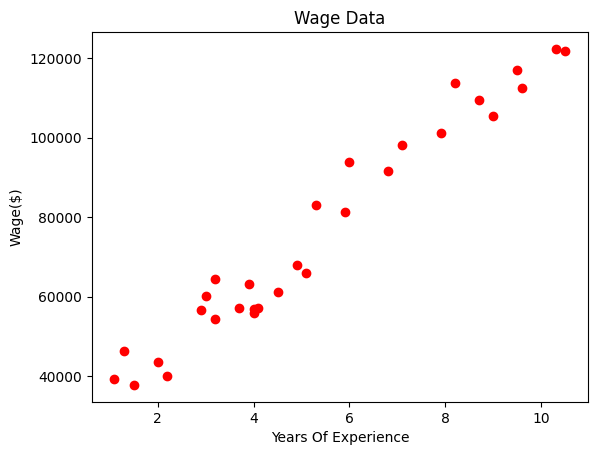

In [77]:
plt.scatter(exp,wage, c="r")
plt.title("Wage Data")
plt.ylabel("Wage($)")
plt.xlabel("Years Of Experience")
plt.show()

In [84]:
def compute_prediction(x,y,m,c):
    size = x.shape[0]
    prediction = np.zeros(size)
    for i in range(size):
        prediction[i] = m*x[i] + c
        
    return prediction
    

In [85]:
def compute_cost(x,y,m,c):
    avg_cost = 0
    size = x.shape[0]
    
    for i in range(size):
        prediction = m*x[i] + c
        avg_cost += (prediction - y[i]) ** 2
    avg_cost /= (2*size)
    
    return avg_cost

In [86]:
def compute_gradient(x,y,m,c) :
    size = x.shape[0]
    d_m = 0
    d_c = 0
    for i in range(size):
        prediction = m*x[i] + c
        d_m_i = (prediction - y[i]) * x[i]
        d_c_i = prediction - y[i]
        d_m += d_m_i
        d_c += d_c_i
    d_m /= size
    d_c /= size
    
    return d_m, d_c

In [87]:
def gradient_descent(x, y, init_m, init_c, alpha, iterations, compute_gradient):
    m = copy.deepcopy(init_m)
    
    c = init_c
    m = init_m
    
    for i in range(iterations):
        d_m, d_c = compute_gradient(x, y, m, c)
        
        c = c - alpha * d_c
        m = m - alpha * d_m
    
    return m, c

In [88]:
#parameters
init_m = 0
init_c = 0
alpha = 0.002
iterations = 10000

m,c = gradient_descent(exp, wage, init_m, init_c, alpha, iterations, compute_gradient)
print(m,c)

9501.42731312551 25445.39127944359


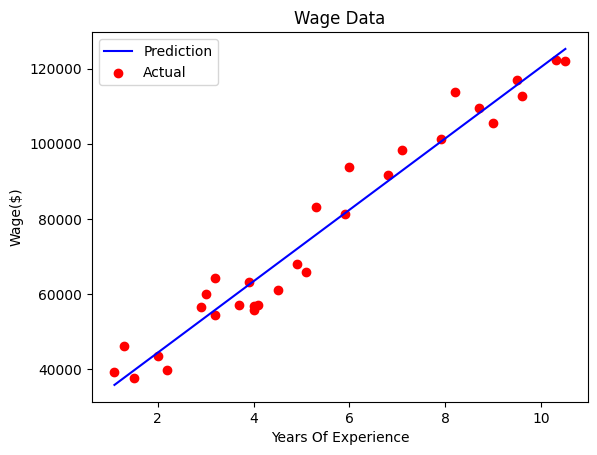

In [90]:
prediction = compute_prediction(exp, wage, m, c)
plt.plot(exp, prediction, c="blue", label = "Prediction")
plt.scatter(exp,wage, c="r", label = "Actual")
plt.title("Wage Data")
plt.ylabel("Wage($)")
plt.xlabel("Years Of Experience")
plt.legend()
plt.show()

In [100]:
print('Predicted Wage After Six Years: $',m*6 + c)

Predicted Wage After Six Years: $ 82453.95515819665
